In [ ]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

letter_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
names = ["lettr", "x-box", "y-box", "width", "high", "onpix", "x-bar", "y-bar", "x2bar", 
         "y2bar", "xybar", "x2ybr", "xy2br", "x-ege", "xegvy", "y-ege", "yegvx"]
letter_data = pd.read_csv(letter_url, names=names)

In [2]:
### Parametros
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = letter_data.drop(["lettr"], axis=1)
Y = letter_data['lettr']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [6]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

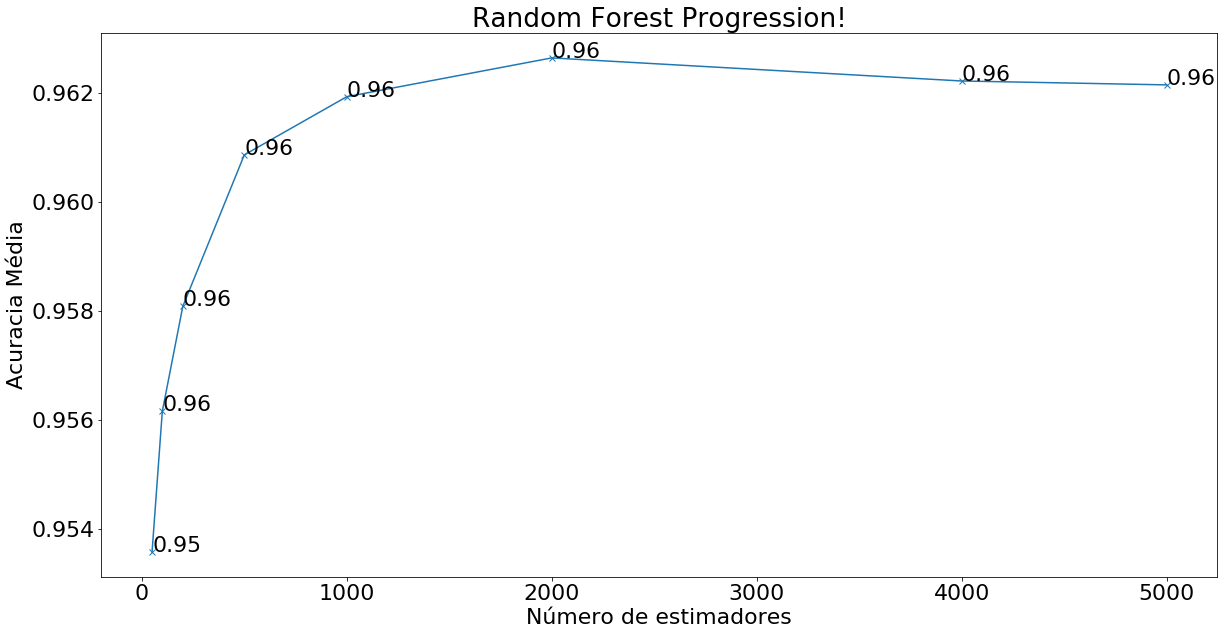

In [8]:
estimator=[50, 100, 200, 500, 1000, 2000, 4000, 5000]
means=[]
stds=[]
for i in estimator:
  forest = RandomForestClassifier(n_estimators=i, criterion='gini', random_state=42)
  all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
  means.append(all_accuracies.mean())
  stds.append(all_accuracies.std())
  
# plotting the points  
plt.plot(estimator, means, marker='x') 
  
# naming the x axis 
plt.xlabel('Número de estimadores') 
# naming the y axis 
plt.ylabel('Acuracia Média') 

for x, y in zip(estimator,means):
  plt.text(x, y, str("%.2f" % y))

# giving a title to my graph 
plt.title('Random Forest Progression!') 
  
# function to show the plot 
plt.show() 

In [ ]:
estimator=[50, 100, 200, 500, 1000, 2000, 4000, 5000]
means=[]
stds=[]
for i in estimator:
  forest = RandomForestClassifier(n_estimators=i, criterion='entropy', random_state=42)
  all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
  means.append(all_accuracies.mean())
  stds.append(all_accuracies.std())
  
# plotting the points  
plt.plot(estimator, means, marker='x') 
  
# naming the x axis 
plt.xlabel('Número de estimadores') 
# naming the y axis 
plt.ylabel('Acuracia Média') 

for x, y in zip(estimator,means):
  plt.text(x, y, str("%.2f" % y))

# giving a title to my graph 
plt.title('Random Forest - Entropy') 
  
# function to show the plot 
plt.show() 

### Classfication Report

In [ ]:
rf = RandomForestClassifier(n_estimators=2000, criterion='entropy', random_state=42)
y_pred = rf.predict(X_test)

print(classification_report(y_pred, Y_test))